In [1]:
# Importing packages 
import os
import pandas as pd 
from __future__ import print_function 

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Finding data on NYC Open Data Portal 

I'll be working with a dataset called _Water Consumption In 
The New York City_ which contains historical data of water consumption in the city. 

The dataset can be accessed here: 
https://data.cityofnewyork.us/Environment/Water-Consumption-In-The-New-York-City/ia2d-e54m



### Downloading data from the portal

In [2]:
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD > water_consumption.csv



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0  1006    0     0   4188      0 --:--:-- --:--:-- --:--:--  4191


In [3]:
# Check if we have an environmental variable "PUIDATA" set up 
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/tm1722/PUIdata


In [4]:
# Move the data
!mv water_consumption.csv $PUIDATA

In [5]:
# Check if the data transferred 
!ls $PUIDATA

water_consumption.csv


### Data mangling using _pandas_

In [6]:
# Read the data with pandas
water_consumption = pd.read_csv("%s/water_consumption.csv"%os.getenv("PUIDATA"))

In [7]:
# Print the first 7 rows of the dataset
water_consumption.head(7)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182


In [8]:
# Look at all variables to decide which ones to keep
water_consumption.columns

Index(['Year', 'New York City Population',
       'NYC Consumption(Million gallons per day)',
       'Per Capita(Gallons per person per day)'],
      dtype='object')

In [9]:
# Count number of rows/data points
water_consumption.size

156

In [10]:
water_consumption_2 = water_consumption[['Per Capita(Gallons per person per day)', 'NYC Consumption(Million gallons per day)']]

In [11]:
water_consumption_2.head()

,Per Capita(Gallons per person per day),NYC Consumption(Million gallons per day)
0,213,1512.0
1,213,1506.0
2,185,1309.0
3,194,1382.0
4,198,1424.0


### Plotting data

Text(0.5,1,'NYC Water Consumption')

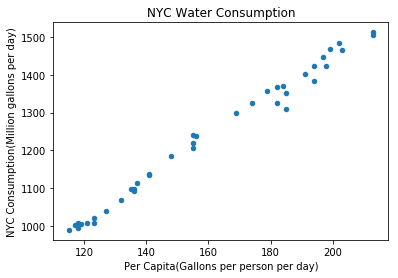

In [12]:
# Plot variables from the new dataframe
water_consumption_2.plot(x='Per Capita(Gallons per person per day)', y='NYC Consumption(Million gallons per day)', kind='scatter')
pylab.title('NYC Water Consumption')

Figure 1: numbers of total NYC water consumptions(in million gallons per day) against per capita consumption (gallons per person per day). Predictably, there is a linear relationship between the variables.

# Solution 2: Use API and download a json file
AKA Doing it the extra credit way!!!!!

In [13]:
url_2 = "https://data.cityofnewyork.us/resource/waf7-5gvc.json"

In [14]:
# Use pandas' read_json function to read the file
df = pd.read_json(url_2)
df.head(7)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985


In [15]:
# Create a new dataframe with columns we want to keep
water_consumption_3 = df[['per_capita_gallons_per_person_per_day', 'nyc_consumption_million_gallons_per_day', 'year']]

In [16]:
# Rename variables to be consistent with the CSV solution
water_consumption_3 = water_consumption_3.rename(columns = {'per_capita_gallons_per_person_per_day':'Per Capita (Gallons per person per day)',
                                    'nyc_consumption_million_gallons_per_day':'NYC Consumption (Million gallons per day)',
                                                                       'year':'Year'})

In [17]:
water_consumption_3 = water_consumption_3.sort_values(by=['Year'])
water_consumption_3.head()

,Per Capita (Gallons per person per day),NYC Consumption (Million gallons per day),Year
0,213,1512.0,1979
1,213,1506.0,1980
2,185,1309.0,1981
3,194,1382.0,1982
4,198,1424.0,1983


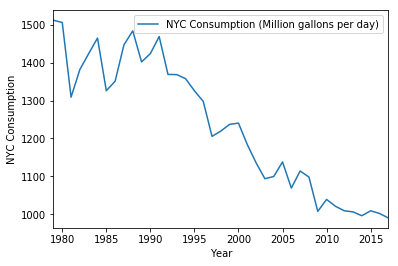

In [18]:
# Plot NYC Daily Water Consumption by year
ax = water_consumption_3.plot(y='NYC Consumption (Million gallons per day)', x='Year');
ax.set_ylabel("NYC Consumption");

Figure 2: NYC Daily Water Consumption (in Million gallons per day) as a function of time between 1980 and 2016. We can see that New 
Yorkers are using much less water now than before. It is unclear if
people are better with water consumption or if technology got more 
efficient

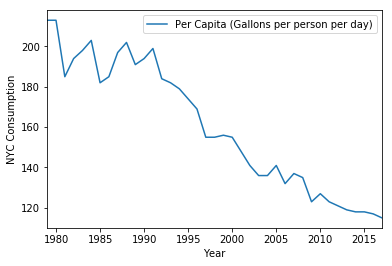

In [19]:
# Plot per capita water consumption by year
ax2 = water_consumption_3.plot(y='Per Capita (Gallons per person per day)', x='Year');
ax2.set_ylabel("NYC Consumption");

Figure 3: NYC per capita Daily Water Consumption (in gallons per person per day) as a function of time between 1980 and 2016. We can see a similar as in Figure 2. 